**Zad 1**

Proszę o stworzenia prostego zestawu danych. Należy skorzystać z funkcji make_blobs()
służącej do generowania zbiorów punktów (z biblioteki sklearn należy zaimportować datasets):

1.1. Zbiór danych składa się z 50 punktów, dane będą podzielone na 2 klastry, odchylenie
standardowe dla każdego skupienia, czyli rozproszenie jest równe 0.60, ziarno generatora liczb
losowych = 0).

1.2. Należy przygotować wykres punktowy X i y.

1.3. Proszę zbudować 3 liniowe klasyfikatory, które będą rozdzielać powyższe dane. W tym
celu należy wygenerować 3 proste (y = w0 +w1x1, w0= 0.65, 1.6, 2.9, w1 = 1, 0.5, -0.2).

1.4. Należy wokół każdej prostej narysować margines o szerokości równej odległości do
najbliższego jej punktu. Prosta, która maksymalizuje szerokość marginesu, reprezentuje model
optymalnego klasyfikatora.

1.5. Należy stworzyć klasyfikator, który będzie wytrenowanych na danych. W tym celu należy
stworzyć obiekt model_svc. Przy czym klasyfikator wektorów nośnych SVC będzie zbudowany
na kernelu liniowym, a hiperparametr regularyzacyjny będzie równy 1·10^10. Następnie dla
obiektu model należy wywołać metodę fit(), która dopasuje model do danych treningowych.
Należy przygotować wizualizację działania klasyfikatora wykorzystującego maszynę
wektorów nośnych dopasowanego do danych. Liniami przerywanymi należy zaznaczyć
marginesy, a okręgami wektory nośne, czyli punkty znajdujące się na brzegu marginesu.
Współrzędne wektorów nośnych są przechowywane w atrybucie support_vectors_
klasyfikatora.

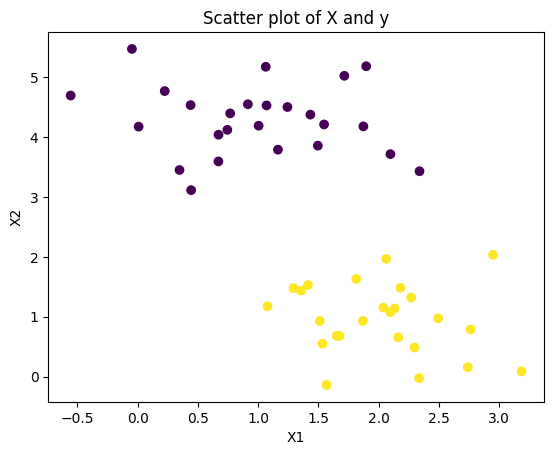

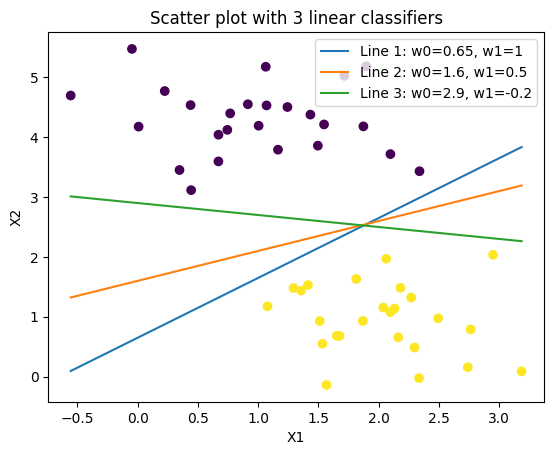

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Scatter plot of X and y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
w0 = [0.65, 1.6, 2.9]
w1 = [1, 0.5, -0.2]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

for i in range(3):
    y_values = w0[i] + w1[i] * x_values
    plt.plot(x_values, y_values, label=f'Line {i+1}: w0={w0[i]}, w1={w1[i]}')

plt.legend()
plt.title('Scatter plot with 3 linear classifiers')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

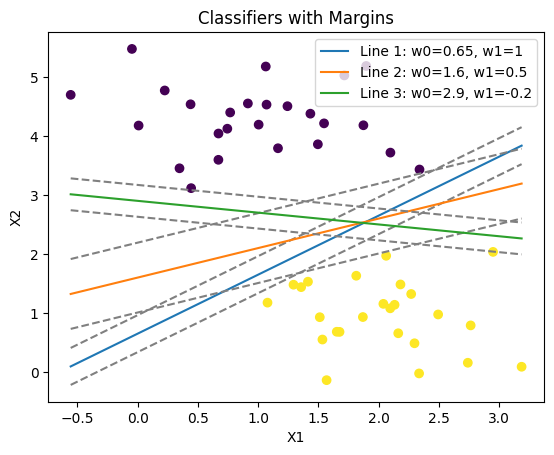

(2, 0.5917510713524893)

In [9]:
def distance_point_to_line(w0, w1, x, y):
    return abs(w1 * x - y + w0) / np.sqrt(w1**2 + 1)

margins = []

for i in range(3):
    distances = [distance_point_to_line(w0[i], w1[i], X[j, 0], X[j, 1]) for j in range(len(X))]
    margin = min(distances)
    margins.append(margin)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

for i in range(3):
    y_values = w0[i] + w1[i] * x_values
    plt.plot(x_values, y_values, label=f'Line {i+1}: w0={w0[i]}, w1={w1[i]}')

    plt.plot(x_values, y_values + margins[i], linestyle='--', color='gray')
    plt.plot(x_values, y_values - margins[i], linestyle='--', color='gray')

plt.legend()
plt.title('Classifiers with Margins')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

optimal_classifier_idx = np.argmax(margins)
optimal_classifier_idx + 1, margins[optimal_classifier_idx]

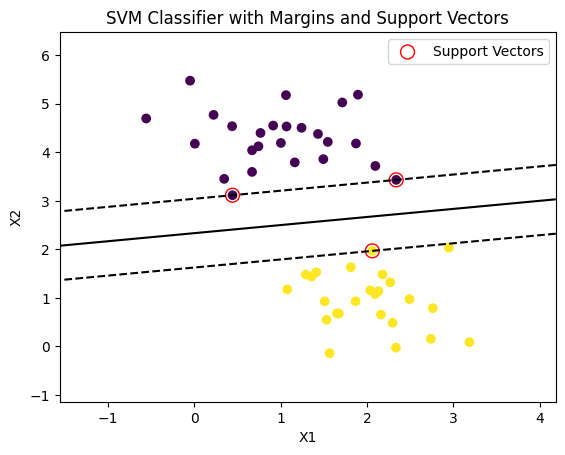

In [13]:
from sklearn.svm import SVC


model_svc = SVC(kernel='linear', C=1e10)
model_svc.fit(X, y)

support_vectors = model_svc.support_vectors_

xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 500),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 500))

Z = model_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='black')

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='r', label='Support Vectors')

plt.title('SVM Classifier with Margins and Support Vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


**Zad 2**

Na dopasowanie klasyfikatora SVM wpływ mają jedynie współrzędne wektorów nośnych.
Należy wyrysować model wytrenowany na 60 i 120 punktach z następującego zbioru danych
i ocenić wpływ nowych punktów ze zbioru uczącego na model SVM:

Zbiór danych składa się z 200 punktów, dane będą podzielone na 2 klastry, odchylenie
standardowe dla każdego skupienia jest równe 0.60, ziarno generatora liczb losowych = 0.

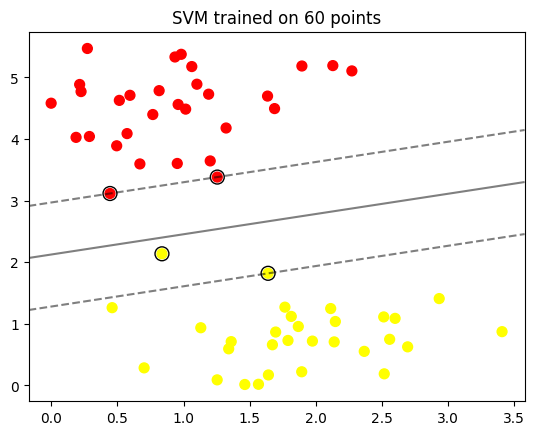

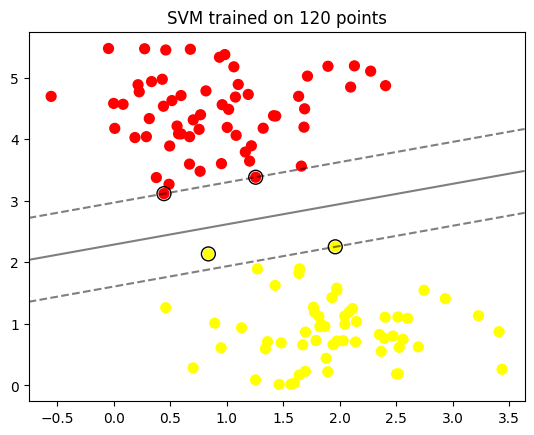

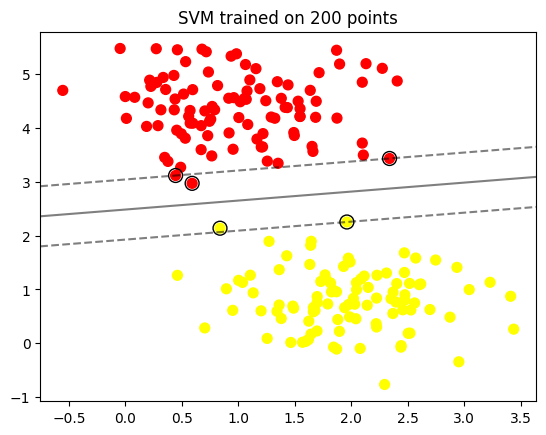

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

n_samples_total = 200
centers = 2
std_dev = 0.60
random_seed = 0

X, y = make_blobs(n_samples=n_samples_total, centers=centers, cluster_std=std_dev, random_state=random_seed)

def plot_svm_decision_boundary(X, y, model, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    plt.title(title)
    plt.show()

svm_60 = SVC(kernel='linear')

svm_60.fit(X[:60], y[:60])

svm_120 = SVC(kernel='linear')
svm_120.fit(X[:120], y[:120])

svm_200 = SVC(kernel='linear')
svm_200.fit(X, y)

plot_svm_decision_boundary(X[:60], y[:60], svm_60, "SVM trained on 60 points")
plot_svm_decision_boundary(X[:120], y[:120], svm_120, "SVM trained on 120 points")
plot_svm_decision_boundary(X, y, svm_200, "SVM trained on 200 points")


**Zad 3**

Należy skorzystać z funkcji make_circles() służącej do generowania danych w kształcie
okręgów (z biblioteki sklearn należy zaimportować datasets). Zbiór składa się ze 100 punktów,
współczynnik skali między wewnętrznym a zewnętrznym okręgiem jest równy 0.1, szum jest
na poziomie 0.1).

3.1. Następnie trzeba utworzyć obiekt clf_svm klasyfikatora SVM (ang. Support Vector
Classifier) z jądrem liniowym i wytrenować na wygenerowanych danych za pomocą metody
fit().

3.2. Należy narysować granicę decyzyjną dla wytrenowanego modelu SVM.

3.3. Liniowy klasyfikator nie będzie w stanie rozdzielić tego typu danych. Tego typu dane
można rzutować na większą liczbę wymiarów, tak aby dało się je rozdzielić za pomocą
separatora liniowego. Można wygenerować wykres 3D, gdzie r będzie obliczane jako funkcja
odległości (oś z):
o r = np.exp(-(X ** 2).sum(1))

3.4. Należy zbudować model SVM z jądrem RBF oraz wyrysować granicę decyzyjną dla
nowego modelu oraz wektory nośne.
Całość ilustruje, jak SVM może klasyfikować dane w różnych przestrzeniach oraz jak zmiana
jądra może wpłynąć na granice decyzyjne.

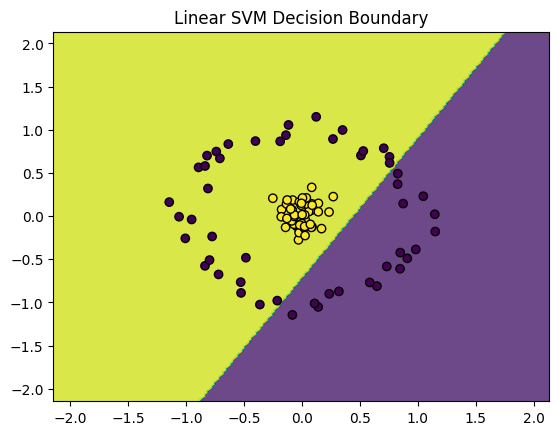

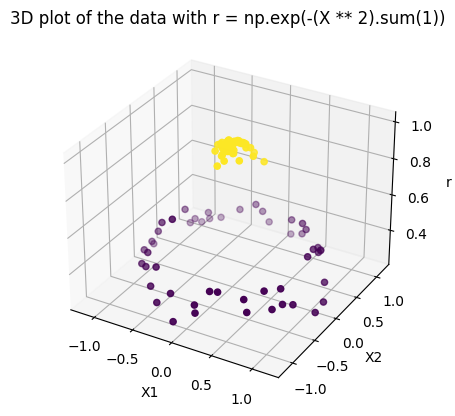

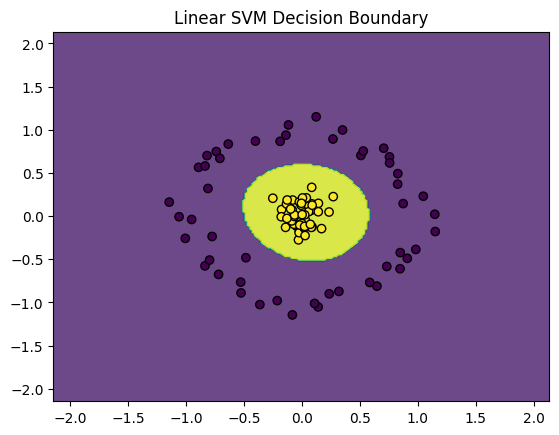

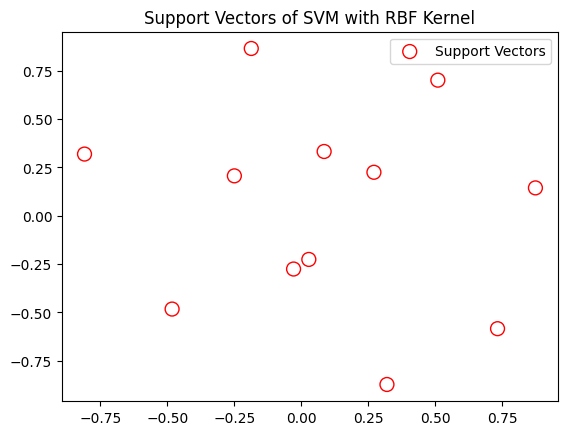

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

X, y = datasets.make_circles(n_samples=100, factor=0.1, noise=0.1)

clf_svm_linear = SVC(kernel='linear')
clf_svm_linear.fit(X, y)

def plot_decision_boundary(clf, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Linear SVM Decision Boundary')
    plt.show()

plot_decision_boundary(clf_svm_linear, X, y)

r = np.exp(-(X ** 2).sum(1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], r, c=y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('r')
plt.title('3D plot of the data with r = np.exp(-(X ** 2).sum(1))')
plt.show()

clf_svm_rbf = SVC(kernel='rbf')
clf_svm_rbf.fit(X, y)

plot_decision_boundary(clf_svm_rbf, X, y)

plt.scatter(clf_svm_rbf.support_vectors_[:, 0], clf_svm_rbf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='r', label='Support Vectors')
plt.legend()
plt.title('Support Vectors of SVM with RBF Kernel')
plt.show()


**Zad 4**

Proszę wygenerować sztuczny zbiór punktów. Zbiór danych składa się z 100 punktów, dane
będą podzielone na 2 klastry odchylenie standardowe dla każdego skupienia, czyli rozproszenie
jest równe 1.2, ziarno generatora liczb losowych = 0).

4.1. Należy przygotować wykres punktowy X i y.

4.2. Dostrajanie SVM – zmiękczanie marginesów:
Wpływ wartości C na marginesy i wyniki dopasowania: Dla powyższego zbioru danych należy
zmienić rozproszenie na 0.8, a następnie zbudować model SVM z jądrem liniowym dla dwóch
wartości C: 0.1 oraz 10, a dalej wyrysować granicę decyzyjną dla nowych modeli oraz wektory
nośne.

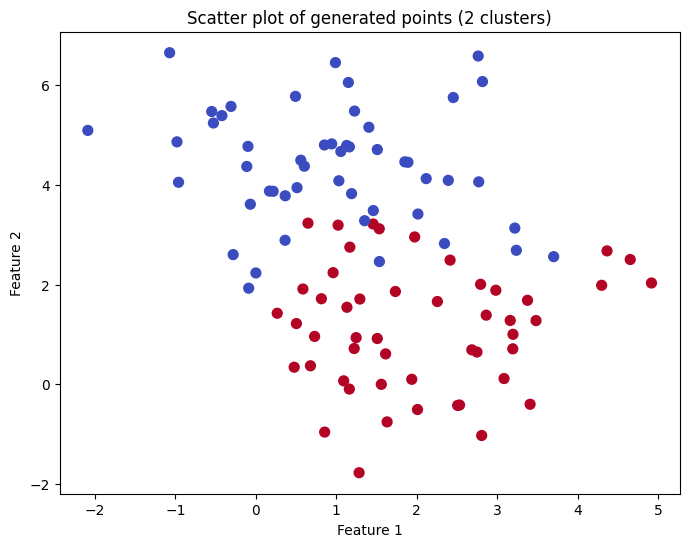

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm

n_samples = 100
centers = 2
cluster_std = 1.2
random_state = 0

X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
plt.title("Scatter plot of generated points (2 clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


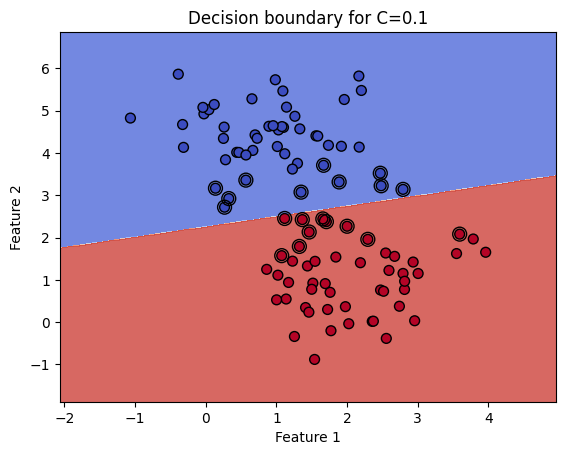

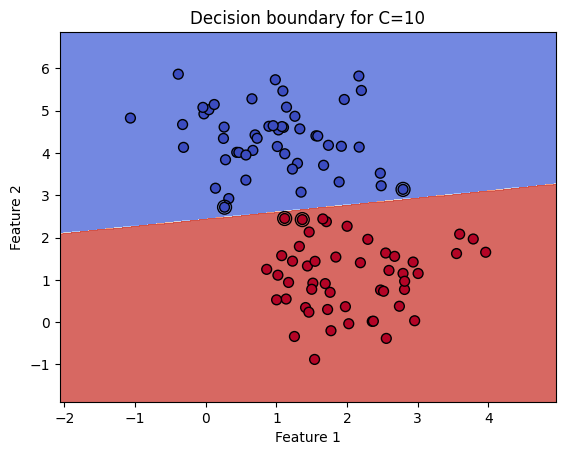

In [18]:
cluster_std_new = 0.8
X_new, y_new = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std_new, random_state=random_state)

model_C_0_1 = svm.SVC(kernel='linear', C=0.1)
model_C_10 = svm.SVC(kernel='linear', C=10)

model_C_0_1.fit(X_new, y_new)
model_C_10.fit(X_new, y_new)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], facecolors='none', s=100, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model_C_0_1, X_new, y_new, "Decision boundary for C=0.1")

plot_decision_boundary(model_C_10, X_new, y_new, "Decision boundary for C=10")


**Zad 5**

Proszę o stworzenia prostego zestawu danych sierpowatych. Należy skorzystać z funkcji
make_moons() służącej do generowania zbiorów punktów (z biblioteki sklearn należy
zaimportować datasets).

5.1. Zbiór danych składa się z 100 punktów, dane będą podzielone na 2 klastry, szum jest na
poziomie 0.15, ziarno generatora liczb losowych = 42.

5.2. Zbudować i wytrenować klasyfikatory SVM na danych treningowych, a następnie
wyrysować granice decyzyjne dla nowych modeli oraz wektory nośne dla następujących 7
modeli:

5.2.1. Model liniowy dla C=10.

5.2.2. Modeli z jądrem wielomianowym:
o stopień wielomianu równy 3 dla coef0 =1 oraz C=5,
o stopień wielomianu równy 10 dla coef0 =100 oraz C=5.

5.2.3. Modeli z jądrem RBF (rbf):
o gamma=0.1, C=0.001,
o gamma=0.1, C=1000,
o gamma=5, C=0.001,
o gamma=5, C=1000.

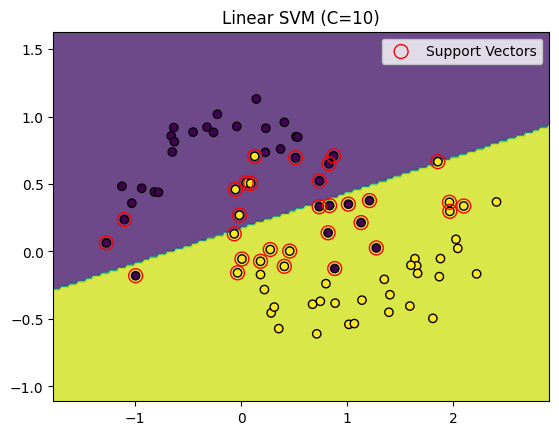

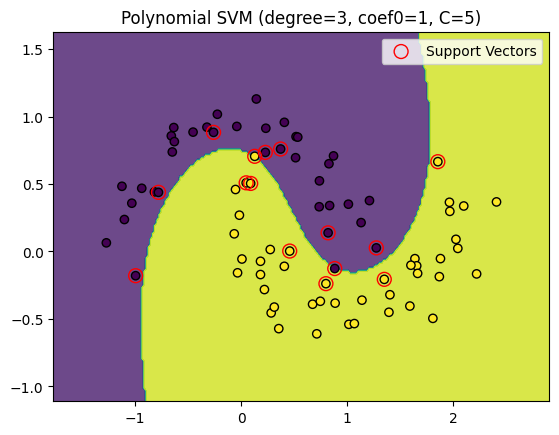

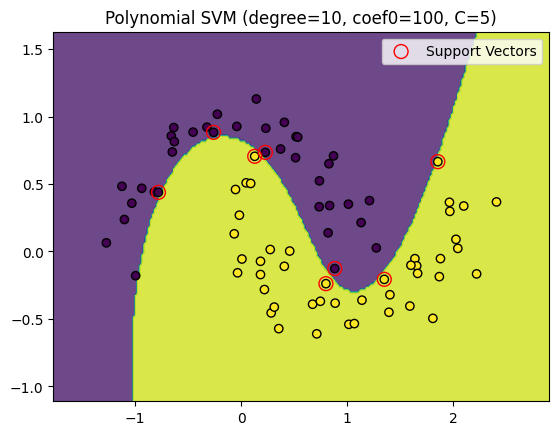

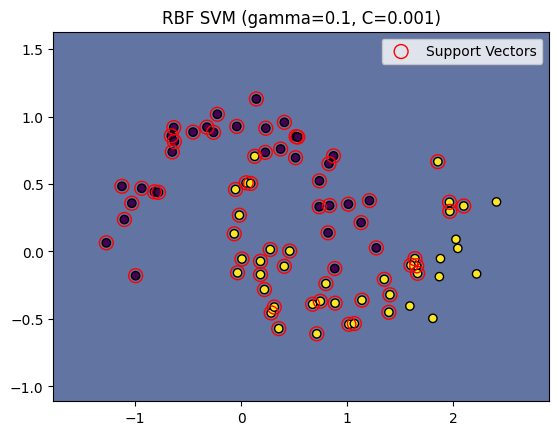

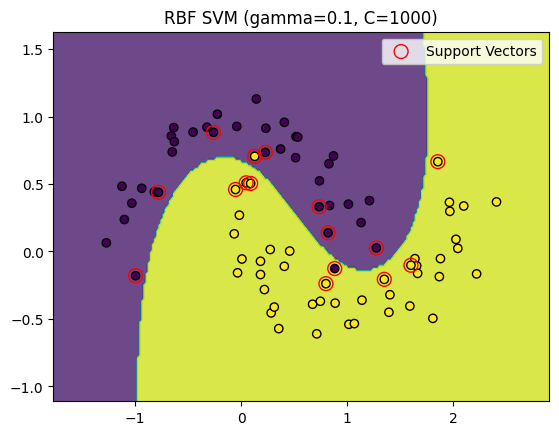

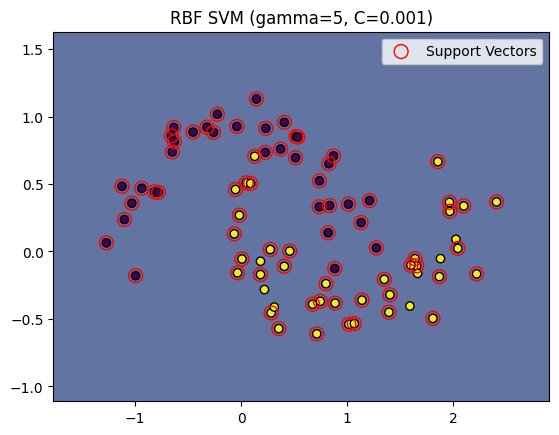

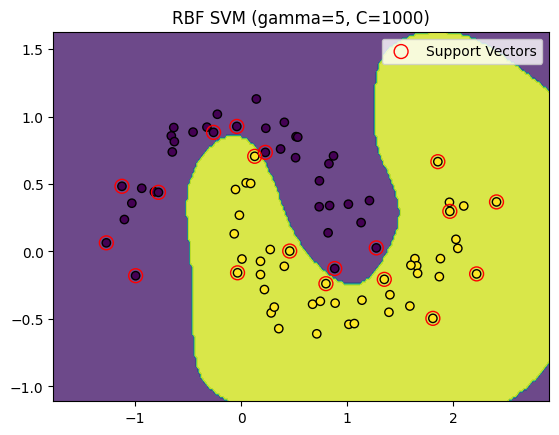

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

np.random.seed(42)

X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='r', label='Support Vectors')
    plt.title(title)
    plt.legend()
    plt.show()

models = [
    ("Linear SVM (C=10)", SVC(kernel='linear', C=10)),
    ("Polynomial SVM (degree=3, coef0=1, C=5)", SVC(kernel='poly', degree=3, coef0=1, C=5)),
    ("Polynomial SVM (degree=10, coef0=100, C=5)", SVC(kernel='poly', degree=10, coef0=100, C=5)),
    ("RBF SVM (gamma=0.1, C=0.001)", SVC(kernel='rbf', gamma=0.1, C=0.001)),
    ("RBF SVM (gamma=0.1, C=1000)", SVC(kernel='rbf', gamma=0.1, C=1000)),
    ("RBF SVM (gamma=5, C=0.001)", SVC(kernel='rbf', gamma=5, C=0.001)),
    ("RBF SVM (gamma=5, C=1000)", SVC(kernel='rbf', gamma=5, C=1000))
]

# Train and plot decision boundaries for each model
for name, model in models:
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_train, y_train, name)


**Zad 6**

Proszę o pobranie danych ze źródła:

https://www.kaggle.com/datasets/asmaabdolahpoor/wine-fraud/

Zestaw danych dotyczy próbek czerwonego i białego wina ‘Vinho verde’ z północnej Portugalii.
Celem jest modelowanie jakości wina na podstawie testów fizykochemicznych, czyli
wytrenowanie modelu klasyfikującego, zdolnego do przewidywania jakości wina na podstawie
analizy chemicznej wina. Dostępne są jedynie zmienne fizykochemiczne (wejściowe) oraz
sensoryczne (wyjściowe) , brak jest danych dotyczących typów winogron, marki wina, ceny
sprzedaży wina itp. ze względów prawnych i logistycznych.

6.1. Otwarcie pliku z danymi. Należy zaimportować nazwy kolumn i stworzyć obiekt df_wine.

6.2. Sprawdzenie podstawowych statystyk.

6.3. Sprawdzenie kompletności danych.

6.4. Utworzenie wykresu słupkowego ilości wystąpień kategorii dotyczącej atrybutu
warunkowego. Czy zbiór danych jest zbalansowany czy niezbalansowany?

6.5. Czy istnieje różnica między winem czerwonym i białym, jeżeli chodzi o przypadki
fałszerstwa?

6.6. Jaki procent win czerwonych jest fałszywych, a jaki procent win białych jest fałszywych?

6.7. Jaka jest korelacja między różnymi cechami chemicznymi wina, a jakością wina?

6.8. Przygotowanie danych - zamiana kolumny kategorialnej dotyczącej rodzaju wina.

6.9. Podział danych na macierz cech X oraz etykiety y.

6.10. Do zmiennych X_train, X_test, y_train, y_test należy zapisać dane powstałe z podziału X
i y na dane uczące i testowe (z biblioteki sklearn.model_selection należy zaimportować
train_test_split). Podział zbioru danych na treningowy i testowy, gdzie zbiór testowy stanowi
15% całego zbioru danych, ziarno generatora liczb losowych = 101.

6.11. Skalowanie danych → standaryzacja. Z biblioteki sklearn.preprocessing należy
zaimportować StandardScaler:

o Należy stworzyć obiekt scaler, który będzie służył do standaryzacji danych:
scaler = StandardScaler()

o Następnie dla obiektu scaler należy wywołać metodę fit, która dopasuje model do
danych treningowych. WAŻNE !!! Trenowanie odbywa się na tylko na macierzy cech
(X_train):
scaler.fit(X_train)

o Następnie oryginalny treningowy zestaw cech zostanie przekształcony przy użyciu
metody transform():
scaled_X_train = scaler.transform(X_train)

o Należy również przekształcić testowy zestaw cech (X_test) za pomocą transform:
scaled_X_test = scaler.transform(X_test)

6.12. Stworzenie i trenowanie modelu (zastosowanie klasyfikatora maszyny wektorów nośnych
(klasa SVC). Należy stworzyć obiekt model_svc. Dla obiektu model_svc należy wywołać
metodę fit(), która ma nauczyć model w jaki sposób odgadywać jakość wina w oparciu o
właściwości fizykochemiczne wina na zbiorze treningowym):
model_svc.fit(scaled_X_train, y_train)

6.13. W zmiennej y_pred należy zapisać wynik predykcji dla scaled_X_test.

6.14. Wyświetlenie raportu z klasyfikacji oraz macierz błędów dla modelu. Czy model działa
dobrze? Odpowiedź uzasadnij.

6.15. Zastosować metodę przeszukiwania siatki lub przeszukiwanie losowe w celu doboru
optymalnych parametrów klasyfikatora.

6.16. Wyświetl raport z klasyfikacji oraz macierz błędów dla modelu (y_test, y_pred). Czy
model działa dobrze? Czy jakość klasyfikacji uległa zmianie w porównaniu do modelu
wygenerowanego z ustawieniami domyślnymi? Odpowiedź uzasadnij.

In [21]:
import pandas as pd

file_path = '/content/wine_fraud.csv'
df_wine = pd.read_csv(file_path)

df_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [22]:
df_wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legit,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6251,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,NaN,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,NaN,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,NaN,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,NaN,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,NaN,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,NaN,NaN


In [23]:
df_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<ipython-input-24-9911a8d65195>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df_wine, palette='Set2')


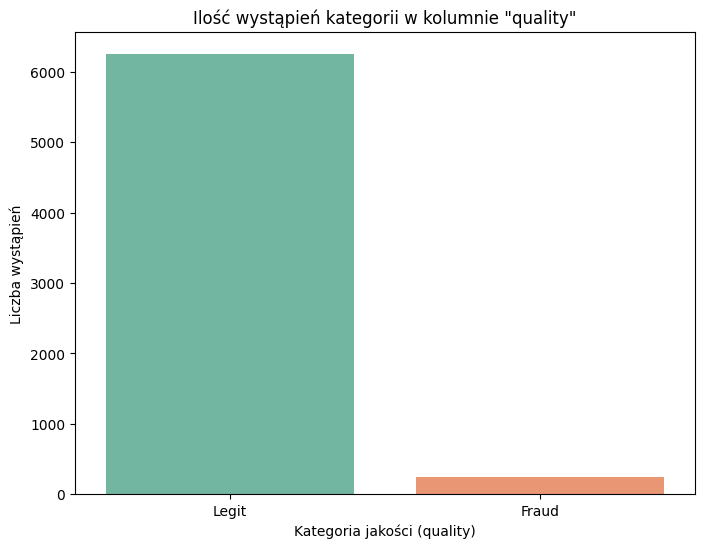

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='quality', data=df_wine, palette='Set2')
plt.title('Ilość wystąpień kategorii w kolumnie "quality"')
plt.xlabel('Kategoria jakości (quality)')
plt.ylabel('Liczba wystąpień')
plt.show()

In [25]:
df_grouped = df_wine.groupby(['type', 'quality']).size().reset_index(name='count')
print(df_grouped)

    type quality  count
0    red   Fraud     63
1    red   Legit   1536
2  white   Fraud    183
3  white   Legit   4715


In [31]:
red_wine = df_wine[df_wine['type'] == 'red']
white_wine = df_wine[df_wine['type'] == 'white']

percent_fake_red = (red_wine[red_wine['quality'] == 'Fraud'].shape[0] / red_wine.shape[0]) * 100
percent_fake_white = (white_wine[white_wine['quality'] == 'Fraud'].shape[0] / white_wine.shape[0]) * 100

print(f'Procent fałszywych win czerwonych: {percent_fake_red:.2f}%')
print(f'Procent fałszywych win białych: {percent_fake_white:.2f}%')

Procent fałszywych win czerwonych: 3.94%
Procent fałszywych win białych: 3.74%


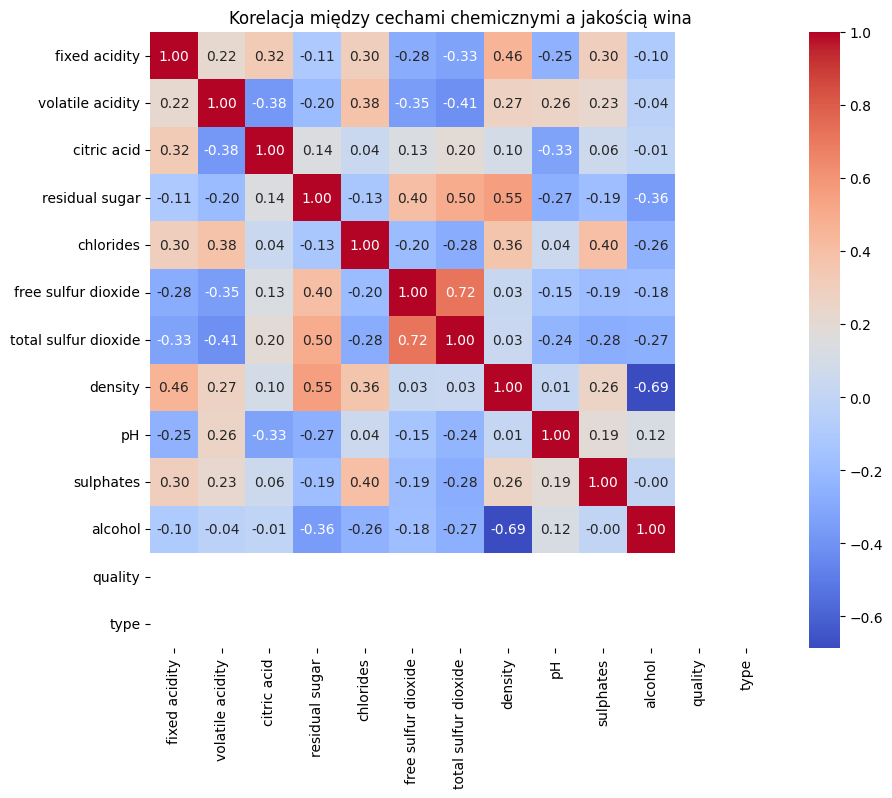

In [51]:
df_wine['quality'] = df_wine['quality'].map({'Legit': 1, 'Fake': 0})

corr_matrix = df_wine.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelacja między cechami chemicznymi a jakością wina')
plt.show()


In [48]:
df_wine['type'] = df_wine['type'].map({'red': 0, 'white': 1})

In [49]:
X = df_wine.drop(columns=['quality'])
y = df_wine['quality'].map({'Legit': 1, 'Fraud': 0})

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [42]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(scaled_X_train, y_train)

SVC()

In [43]:
y_pred = model_svc.predict(scaled_X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0  33]
 [  0 942]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.97      1.00      0.98       942

    accuracy                           0.97       975
   macro avg       0.48      0.50      0.49       975
weighted avg       0.93      0.97      0.95       975



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(scaled_X_train, y_train)

grid_predictions = grid.predict(scaled_X_test)

# Wyświetlenie raportu
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1